### <div class="alert alert-block alert-success"> <span  style= "font-family: Times New Roman">**Objective:** Predict the revenue classification in Online shopping domain based on given attributes  </span> </div>

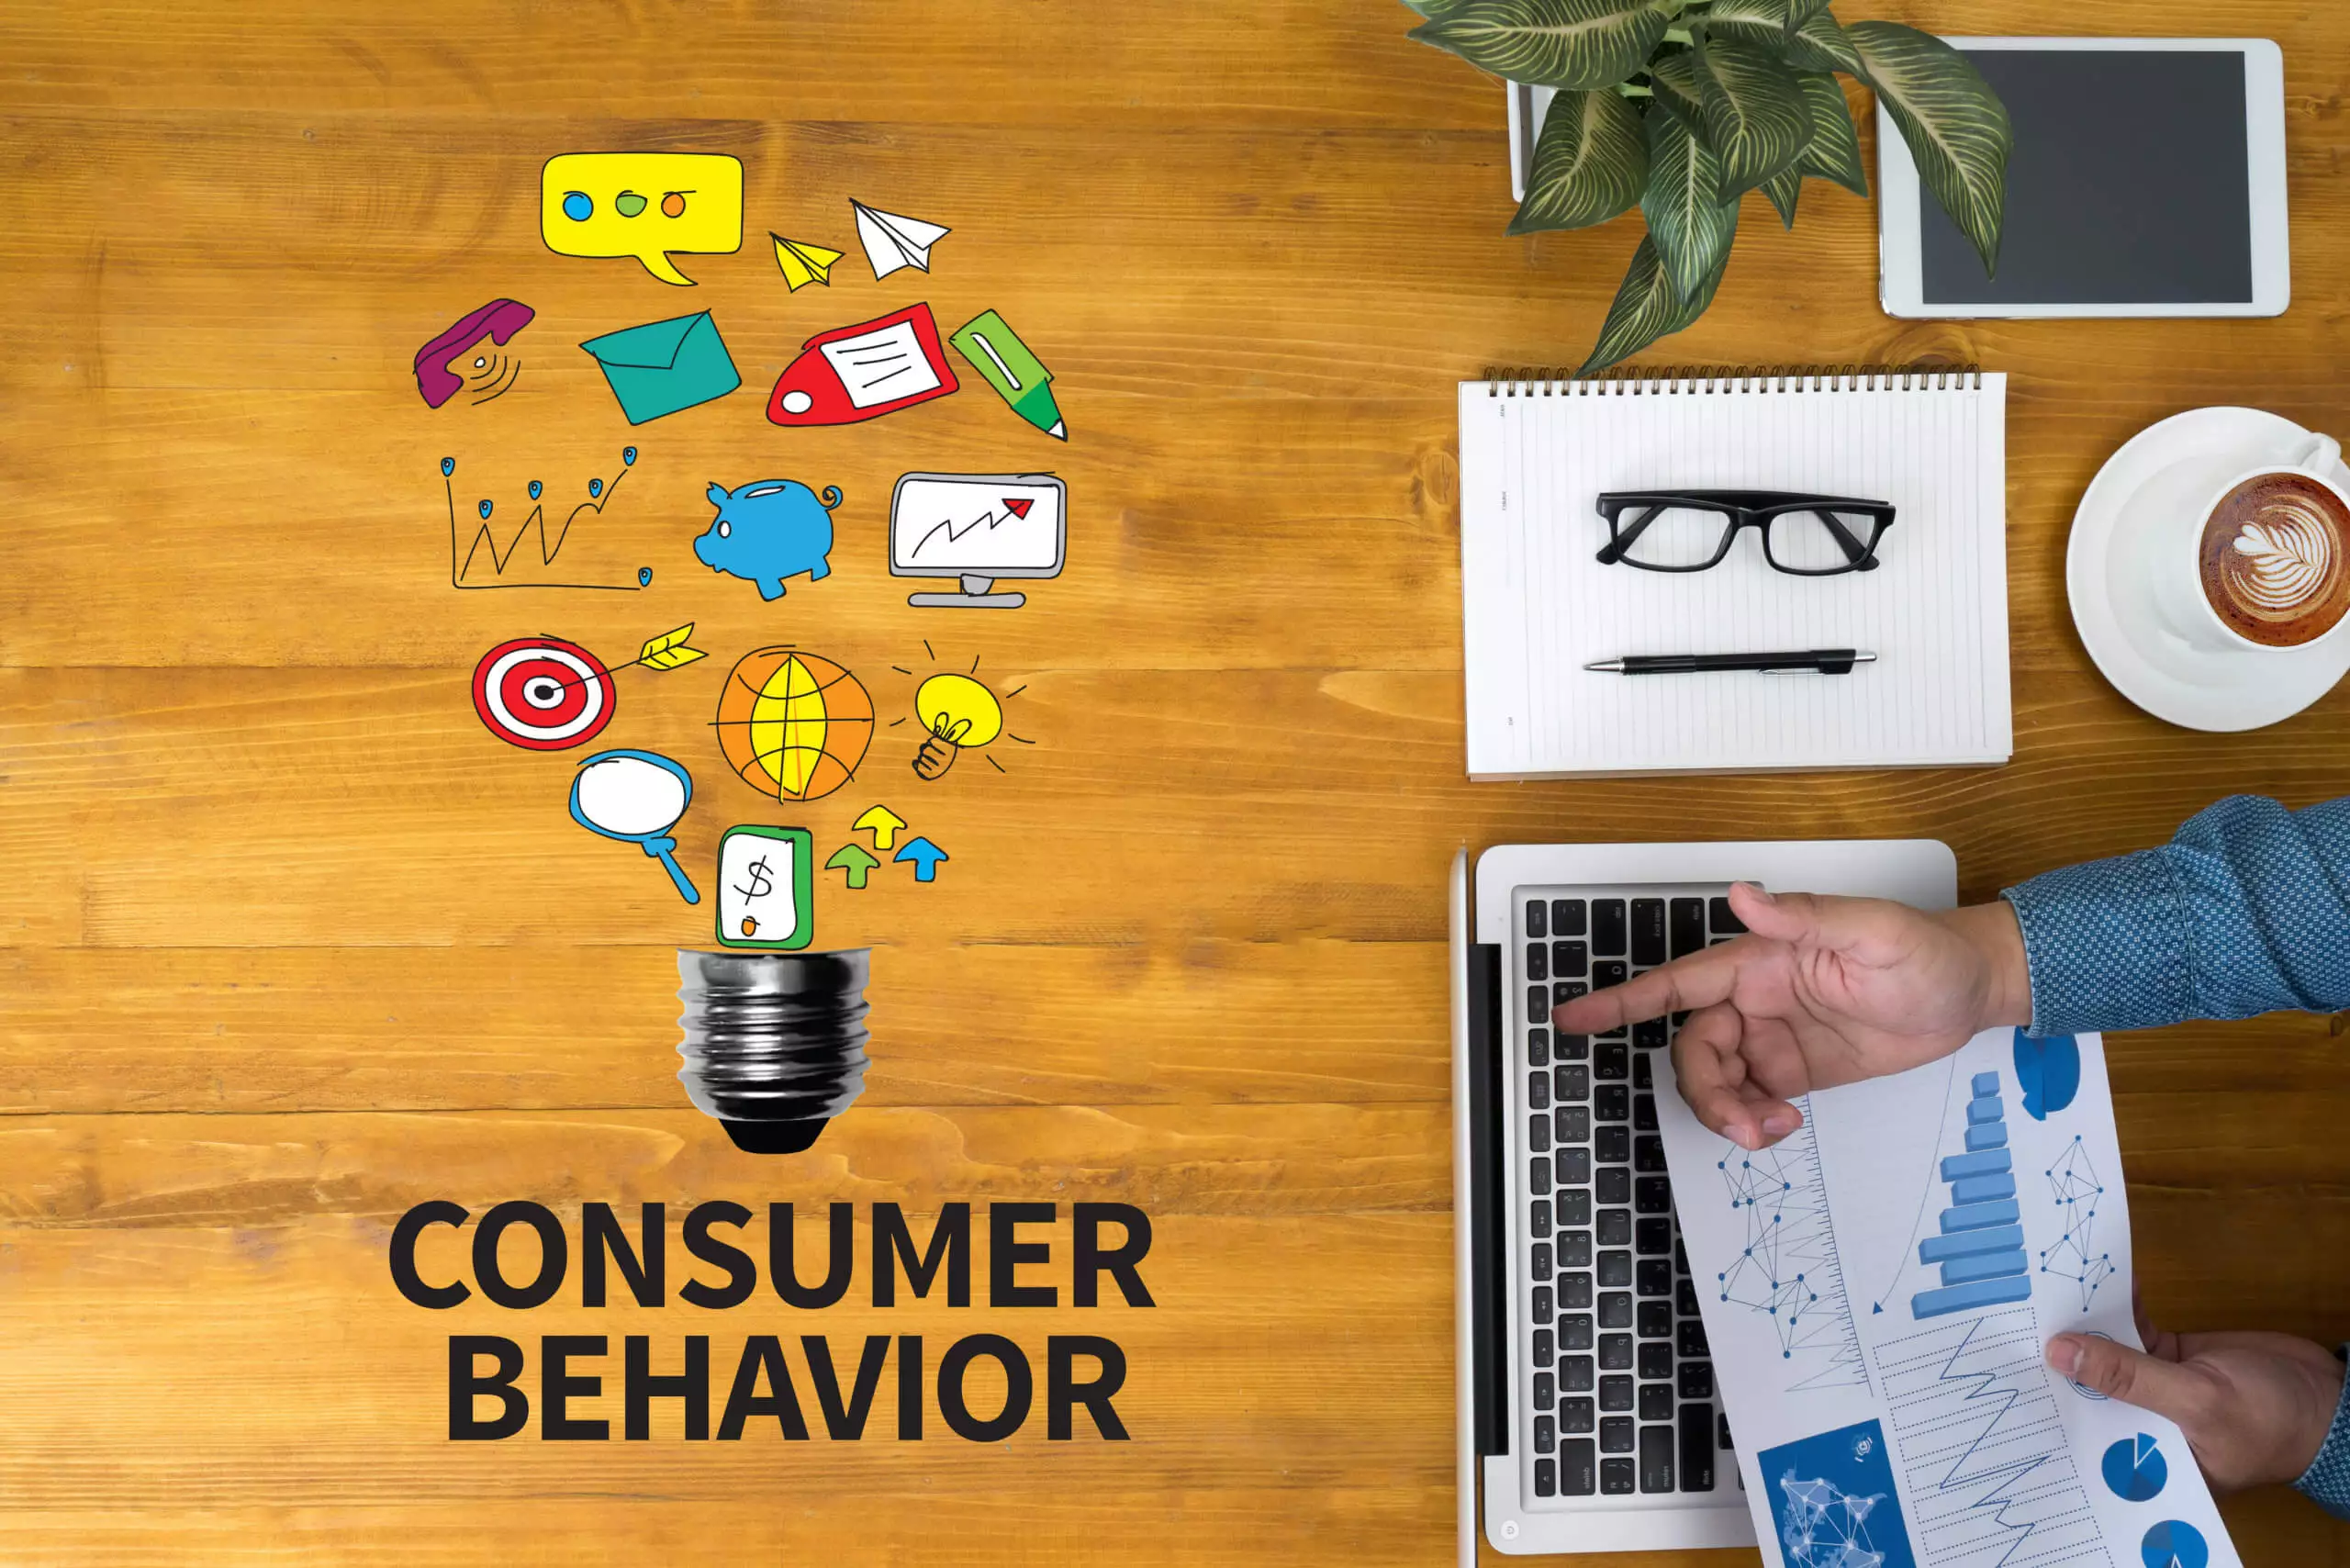

Download the dataset from here: <br>
Click here: <br>
<a href='https://drive.google.com/file/d/1qfPpXiBonU1wnD0Ds17dwKlZ8CUoIBYT/view?usp=share_link' title='Google Drive'> Online Shopping

    
* [1. IMPORTING LIBRARIES](#1)
      
* [2. DATA CLEANING](#2)
    
* [3. EDA](#3) 
      
* [4. MODEL BUILDING](#4)

* [5. END](#5)

<a id="1"></a>
##  <mark><span  style= "font-family: Times New Roman">Import necessary libraries </span> </mark> <a class="anchor" id="Import necessary libraries"></a>

In [120]:
import pandas as pd #library for data manupulation
import numpy as np #library for calculation
import seaborn as sns #library for visualization
import matplotlib.pyplot as plt #library for visualization
import warnings
warnings.filterwarnings('ignore')

In [121]:
df=pd.read_csv(r'online_shoppers_intention.csv')# Reading csv file
df.head()# Top 5 rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [122]:
df.tail()# Bottom 5 rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [123]:
df.shape #dimensions of dataset

(12330, 18)

In [124]:
df.info() #for checking datatypes and empty columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [125]:
df.groupby('Revenue').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Revenue,,,,,,,,,,,,,,,
False,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,2.129726,2.339474,3.159278,4.078392,0.227308
True,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488,0.261530


- We can obsereve the average values helped to get revenue generated

In [126]:
df.describe() #statstical description of columns

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<a id="2"></a>
##  <mark><span  style= "font-family: Times New Roman">Data Cleaning </span> </mark> <a class="anchor" id="Data_preprocessing"></a>

In [127]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<a id="3"></a>
##  <mark><span  style= "font-family: Times New Roman">Exploratory Data Analysis </span> </mark> <a class="anchor" id="Exploratory Data Analysis"></a>

#### Administrative

1. Administrative metric is a type of metric that measures the number of pages that were viewed by users on your website that were related to administrative tasks, such as logging in or managing their account. This metric can be used to track how often users are performing administrative tasks on your website, and to identify any areas where you may need to improve the user experience.

2. For example, if you notice that a large number of users are abandoning the login page, you may need to make it easier for users to log in. You could do this by simplifying the login process or by providing more help and support.

3. Administrative metric can also be used to track the effectiveness of your marketing campaigns. For example, if you notice that a large number of users are visiting your website from a particular marketing campaign, you can conclude that the campaign is successful.

4. Overall, administrative metric is a valuable tool that can be used to improve the user experience on your website and to track the effectiveness of your marketing campaigns.

- Here is an example of how you can use administrative metric to improve your website:

- You notice that a large number of users are abandoning the checkout page.
- You investigate and find that the checkout process is too long and complicated.
- You simplify the checkout process and make it easier for users to pay for their purchases.
- As a result of the changes, you see a decrease in the number of users abandoning the checkout page.

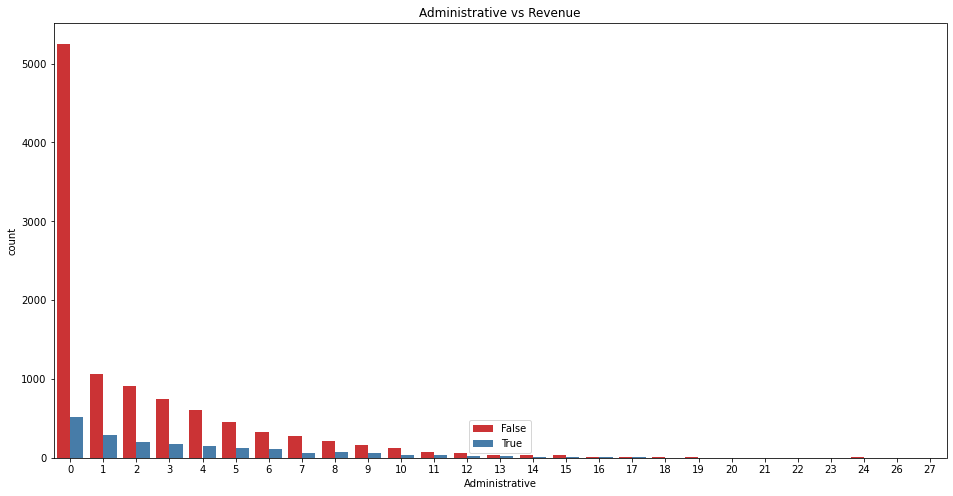

In [128]:
plt.figure(figsize=(16,8))
sns.countplot(df['Administrative'],hue=df['Revenue'],palette="Set1")
plt.title('Administrative vs Revenue')
plt.legend()
plt.show()

- Page 0 has more vistors and revenue also considerablly high where increaase in pages revenue and visitors goes less

<AxesSubplot:xlabel='Revenue', ylabel='Administrative_Duration'>

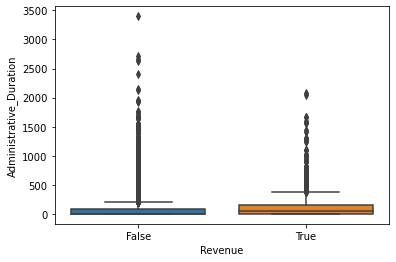

In [129]:
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration')

In [130]:
df.loc[df['Revenue']==True].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,1908.0,3.393606,3.730527,0.0,0.000000,2.000000,5.000000,26.000000
Administrative_Duration,1908.0,119.483244,201.114732,0.0,0.000000,52.366667,151.083333,2086.750000
Informational,1908.0,0.786164,1.521176,0.0,0.000000,0.000000,1.000000,12.000000
Informational_Duration,1908.0,57.611427,171.619131,0.0,0.000000,0.000000,19.000000,1767.666667
ProductRelated,1908.0,48.210168,58.267365,0.0,15.000000,29.000000,57.000000,534.000000
ProductRelated_Duration,1908.0,1876.209615,2312.214392,0.0,541.906250,1109.906250,2266.011310,27009.859430
BounceRates,1908.0,0.005117,0.012185,0.0,0.000000,0.000000,0.006452,0.200000
ExitRates,1908.0,0.019555,0.016463,0.0,0.009521,0.016000,0.025000,0.200000
PageValues,1908.0,27.264518,35.191954,0.0,3.641144,16.758134,38.897742,361.763742
SpecialDay,1908.0,0.023166,0.123521,0.0,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:>

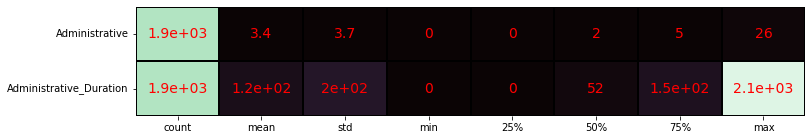

In [131]:
plt.figure(figsize=(12,2))
sns.heatmap(df.loc[df['Revenue']==True].describe().T[:2],annot=True,fmt='.2g',linewidths=1.5,linecolor='black',annot_kws={"size": 14,"color":'RED'}, cmap=sns.color_palette("mako", as_cmap=True),cbar=False)

#### Informational

`Informational`

1. Informational is a metric that measures the number of pages that were viewed by users on your website that were related to providing information, such as a FAQ or a blog post. It is measured in sessions.For example, if a user visits your website and views a FAQ page, a blog post, and a product page, the Informational metric would be 3.Informational can be a useful metric for understanding how users are using your website. For example, if you see that the Informational metric is high, it could be a sign that users are finding your website helpful and informative. Conversely, if you see that the Informational metric is low, it could be a sign that users are not finding your website helpful or informative.

2. You can find Informational in Google Analytics by going to the Behavior > Site Content > All Pages report. In this report, you will see a column for Informational. This column will show you the number of sessions in which users viewed a page that was related to providing information.

`Informational_Duration`

1. Informational_Duration is a metric that measures the total amount of time that users spent on pages related to providing information. It is measured in seconds.

2. For example, if a user spends 10 seconds on a FAQ page and then clicks on a link to another page, the Informational_Duration for that page would be 10 seconds.

3. Informational_Duration can be a useful metric for understanding how users are interacting with your website. For example, if you see that Informational_Duration is high, it could be a sign that users are finding your website helpful and informative. Conversely, if you see that Informational_Duration is low, it could be a sign that users are not finding your website helpful or informative.

4. You can find Informational_Duration in Google Analytics by going to the Behavior > Site Content > All Pages report. In this report, you will see a column for Informational_Duration. This column will show you the average amount of time that users spend on each page that is related to providing information.

- Real-time example

- Let's say you have a website that sells shoes. You want to understand how users are using your website, so you check the Informational and Informational_Duration metrics in Google Analytics.

- You see that the Informational metric is 100, and the Informational_Duration metric is 300 seconds. This means that 100 users visited pages on your website that were related to providing information, and they spent an average of 300 seconds on those pages.

- This information tells you that users are finding your website helpful and informative. They are spending time on pages that provide information about your shoes, such as your FAQ page and your blog posts. This is a good sign, and it suggests that you are doing a good job of providing information to your users.

- You can use this information to make decisions about how to improve your website. For example, you could add more FAQs to your website, or you could write more blog posts about your shoes. You could also make it easier for users to find the information they are looking for by improving your website's navigation.

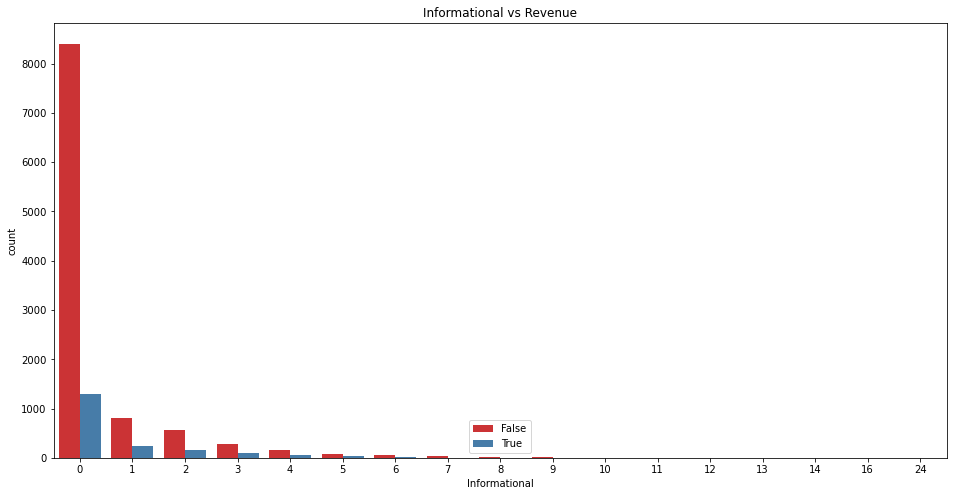

In [132]:
plt.figure(figsize=(16,8))
sns.countplot(df['Informational'],hue=df['Revenue'],palette="Set1")
plt.title('Informational vs Revenue')
plt.legend()
plt.show()

- more visitors freezed on first page and viewed products and revenue generated and there are zero 

<AxesSubplot:xlabel='Revenue', ylabel='Informational_Duration'>

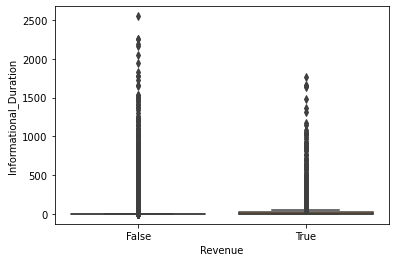

In [133]:
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration')

<AxesSubplot:>

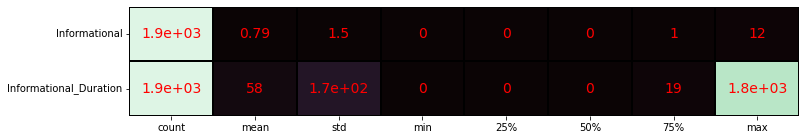

In [134]:
plt.figure(figsize=(12,2))
sns.heatmap(df.loc[df['Revenue']==True].describe().T[2:4],annot=True,fmt='.2g',linewidths=1.5,linecolor='black',annot_kws={"size": 14,"color":'RED'}, cmap=sns.color_palette("mako", as_cmap=True),cbar=False)

#### ProductRelated

1. ProductRelated is a metric that measures the number of pages that were viewed by users on your website that were related to a specific product. It is measured in sessions.

2. For example, if a user visits your website and views a product page, a product review, and a product comparison page, the ProductRelated metric would be 3.

3. ProductRelated can be a useful metric for understanding how users are using your website to learn about your products. For example, if you see that the ProductRelated metric is high, it could be a sign that users are finding your website helpful and informative when they are researching products. Conversely, if you see that the ProductRelated metric is low, it could be a sign that users are not finding your website helpful or informative when they are researching products.

4. You can find ProductRelated in Google Analytics by going to the Behavior > Site Content > All Pages report. In this report, you will see a column for ProductRelated. This column will show you the number of sessions in which users viewed a page that was related to a specific product.
#### ProductRelated_Duration

1. ProductRelated_Duration is a metric that measures the total amount of time that users spent on pages related to a specific product. It is measured in seconds.

2. For example, if a user spends 10 seconds on a product page and then clicks on a link to another page, the ProductRelated_Duration for that page would be 10 seconds.

3. ProductRelated_Duration can be a useful metric for understanding how users are interacting with your website when they are researching products. For example, if you see that ProductRelated_Duration is high, it could be a sign that users are finding your website helpful and informative when they are researching products. Conversely, if you see that ProductRelated_Duration is low, it could be a sign that users are not finding your website helpful or informative when they are researching products.

4. You can find ProductRelated_Duration in Google Analytics by going to the Behavior > Site Content > All Pages report. In this report, you will see a column for ProductRelated_Duration. This column will show you the average amount of time that users spend on each page that is related to a specific product.

###### Real-time example

- Let's say you have a website that sells shoes. You want to understand how users are using your website when they are researching shoes, so you check the ProductRelated and ProductRelated_Duration metrics in Google Analytics.

- You see that the ProductRelated metric is 100, and the ProductRelated_Duration metric is 300 seconds. This means that 100 users visited pages on your website that were related to shoes, and they spent an average of 300 seconds on those pages.

- This information tells you that users are finding your website helpful and informative when they are researching shoes. They are spending time on pages that provide information about your shoes, such as your product pages, your product reviews, and your product comparison pages. This is a good sign, and it suggests that you are doing a good job of providing information to your users when they are researching shoes.

- You can use this information to make decisions about how to improve your website. For example, you could add more product reviews to your website, or you could write more product comparison articles. You could also make it easier for users to find the information they are looking for by improving your website's navigation.

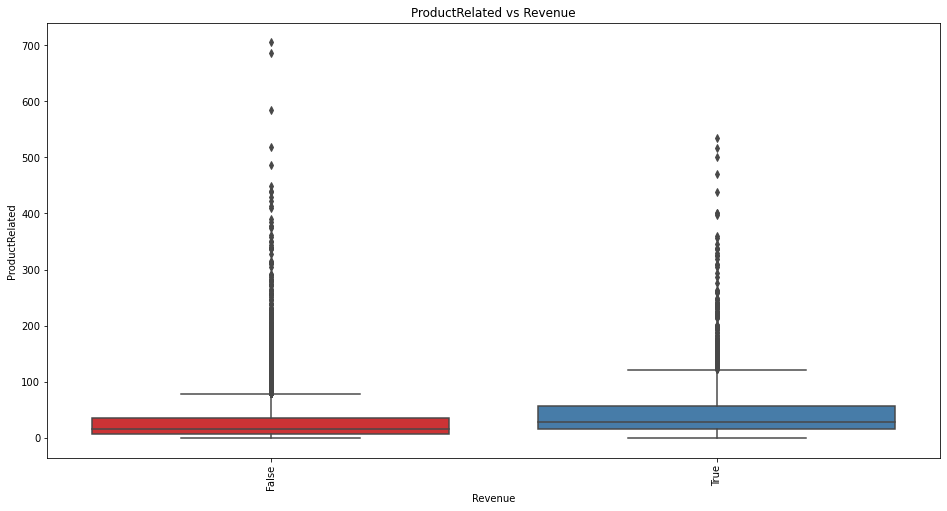

In [135]:
plt.figure(figsize=(16,8))
sns.boxplot(y=df['ProductRelated'],x=df['Revenue'],palette="Set1")
plt.title('ProductRelated vs Revenue')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Revenue', ylabel='ProductRelated_Duration'>

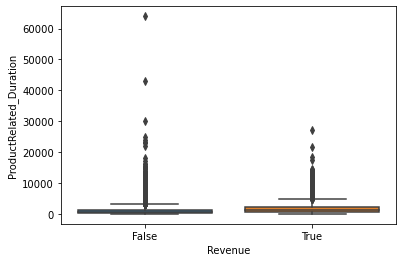

In [136]:
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration')

<AxesSubplot:>

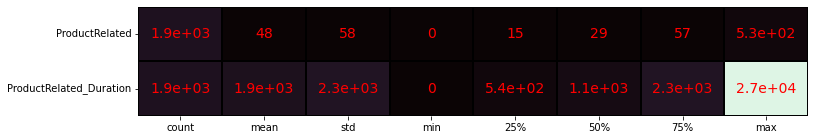

In [137]:
plt.figure(figsize=(12,2))
sns.heatmap(df.loc[df['Revenue']==True].describe().T[4:6],annot=True,fmt='.2g',linewidths=1.5,linecolor='black',annot_kws={"size": 14,"color":'RED'}, cmap=sns.color_palette("mako", as_cmap=True),cbar=False)

#### Bounce rate 
1. Bounce rate is a metric in Google Analytics that measures the percentage of visitors who leave your website after viewing only one page. It is calculated by dividing the number of single-page sessions by the total number of sessions. A high bounce rate can indicate that your website is not engaging visitors, or that your website is not meeting their needs.

- There are a number of things you can do to improve your bounce rate, including:

2. Make sure your website is easy to navigate. Visitors should be able to find what they are looking for quickly and easily.
3. Use clear and concise language. Visitors should be able to understand what your website is about without having to read a lot of text.
4. Use high-quality images and videos. Visual content can help to engage visitors and keep them on your website longer.
5. Offer a call to action. Tell visitors what you want them to do, whether it is to sign up for your newsletter, download a white paper, or make a purchase.
6. You can find your bounce rate in Google Analytics by going to the Audience > Behavior > Bounce Rate report. This report will show you the bounce rate for your website as a whole, as well as the bounce rate for individual pages.

- It is important to note that a high bounce rate is not always a bad thing. For example, if you have a website that is designed to provide information, such as a blog or a FAQ page, you may expect a high bounce rate. However, if you have a website that is designed to sell products or services, you should strive to have a low bounce rate.

- By understanding what causes visitors to bounce from your website, you can take steps to improve your bounce rate and make your website more engaging and user-friendly.

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

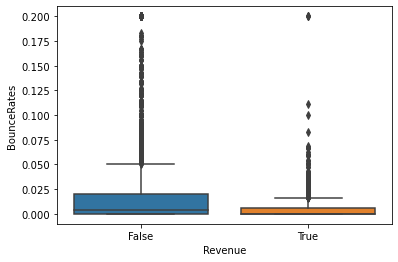

In [138]:
sns.boxplot(data=df, x = 'Revenue', y = 'BounceRates')

<AxesSubplot:>

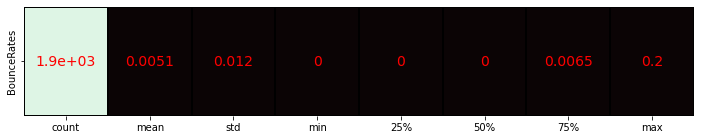

In [139]:
plt.figure(figsize=(12,2))
sns.heatmap(df.loc[df['Revenue']==True].describe().T[6:7],annot=True,fmt='.2g',linewidths=1.5,linecolor='black',annot_kws={"size": 14,"color":'RED'}, cmap=sns.color_palette("mako", as_cmap=True),cbar=False)

#### ExitRates
1. Exit rate is a metric in Google Analytics that measures the percentage of visitors who leave your website from a particular page. It is calculated by dividing the number of exits from a page by the number of pageviews for that page. For example, if a page has 100 pageviews and 20 exits, the exit rate for that page would be 20%.

- Here is a real-time example of how exit rate is calculated in Google Analytics:

1. A visitor lands on your homepage.
- The visitor clicks on a link to your blog post.
- The visitor reads the blog post and then clicks on a link to your contact page.
- The visitor fills out your contact form and submits it.
- The visitor leaves your website.
- In this example, the exit rate for the blog post would be 50%. This is because the visitor exited your website from the blog post after reading it.

2. Exit rate can be a helpful metric for understanding how visitors are interacting with your website. A high exit rate on a particular page may indicate that the page is not meeting the needs of your visitors. This could be due to a number of factors, such as poor page design, confusing content, or a lack of call to action.

- By understanding your exit rates, you can identify pages that need improvement and make changes to improve the user experience. This can lead to increased conversions and improved website traffic.

- Here are some tips for improving your exit rates:

3. Make sure your pages are well-designed and easy to use.
- Use clear and concise language.
- Include a call to action on every page.
- Track your exit rates and identify pages that need improvement.
- By following these tips, you can improve your exit rates and create a better user experience for your visitors.

In [140]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<AxesSubplot:xlabel='Revenue', ylabel='ExitRates'>

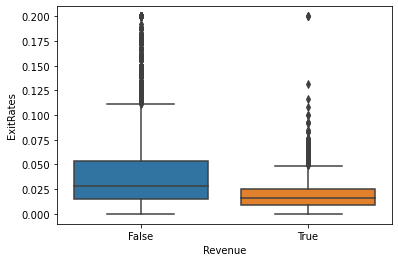

In [141]:
sns.boxplot(data=df, x = 'Revenue', y = 'ExitRates')

#### PageValues
1. Page Value is a metric in Google Analytics that measures the average value of a page view. It is calculated by dividing the total revenue generated by a page by the number of pageviews for that page. For example,if a page generates  100 dollar  in revenue and has 100 pageviews, the Page Value for that page would be  1 dollar.

2. Page Value can be a helpful metric for understanding which pages on your website are most valuable to your business. A high Page Value on a particular page may indicate that the page is effective at generating revenue. This could be due to a number of factors, such as the page's content, design, or placement on your website.

3. By understanding your Page Values, you can identify pages that are most valuable to your business and focus your marketing efforts on those pages. This can lead to increased revenue and improved profitability.

- Here is an example of how Page Value is calculated in Google Analytics:

- A visitor lands on your homepage.
- The visitor clicks on a link to your product page.
- The visitor adds a product to their cart and checks out.
- The visitor pays for the product and completes the purchase.
- In this example, the Page Value for the product page would be the amount of revenue generated by the sale of the product. This amount would be divided by the number of pageviews for the product page to calculate the average Page Value.

4. Page Value can be a valuable metric for understanding the performance of your website, but it is important to note that it is not a perfect metric. There are a number of factors that can affect Page Value, such as the type of business you have, the products or services you offer, and the demographics of your target audience. As a result, it is important to use Page Value in conjunction with other metrics, such as conversion rate and average order value, to get a complete picture of the performance of your website.

- Here are some tips for improving your Page Values:

- Make sure your pages are relevant to your target audience.
- Use clear and concise language.
- Include high-quality images and videos.
- Make sure your pages are easy to navigate.
- Offer incentives for visitors to take action, such as discounts or free shipping.
- By following these tips, you can improve your Page Values and increase the revenue generated by your website.

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

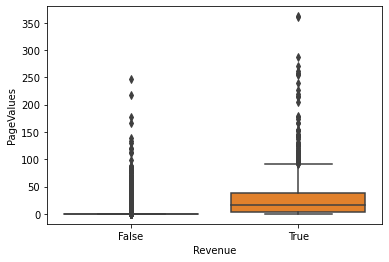

In [142]:
sns.boxplot(data=df, x = 'Revenue', y = 'PageValues')

#### Specialday,Month & Weekend
- lets analyze the revenue generated on special days and lets get kind of conclusion

In [143]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


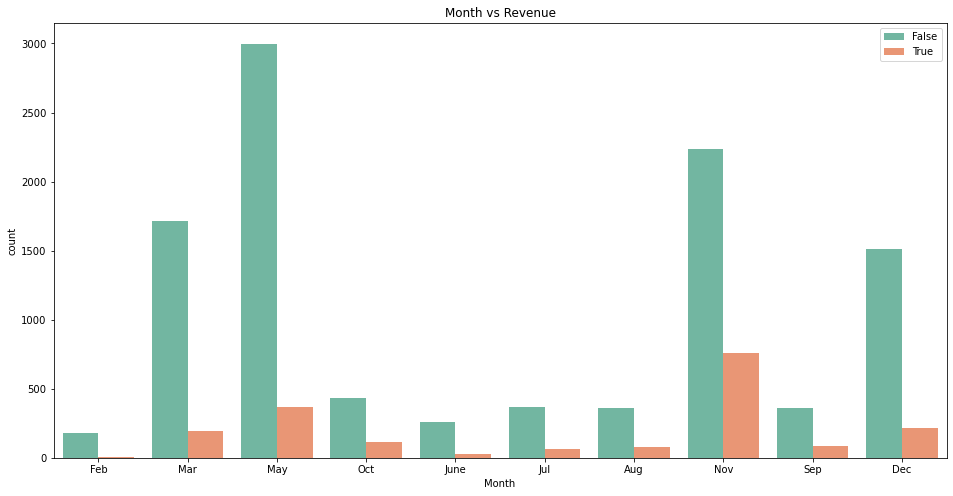

In [144]:
plt.figure(figsize=(16,8))
sns.countplot(df['Month'],hue=df['Revenue'],palette="Set2")
plt.title('Month vs Revenue')
plt.legend()
plt.show()

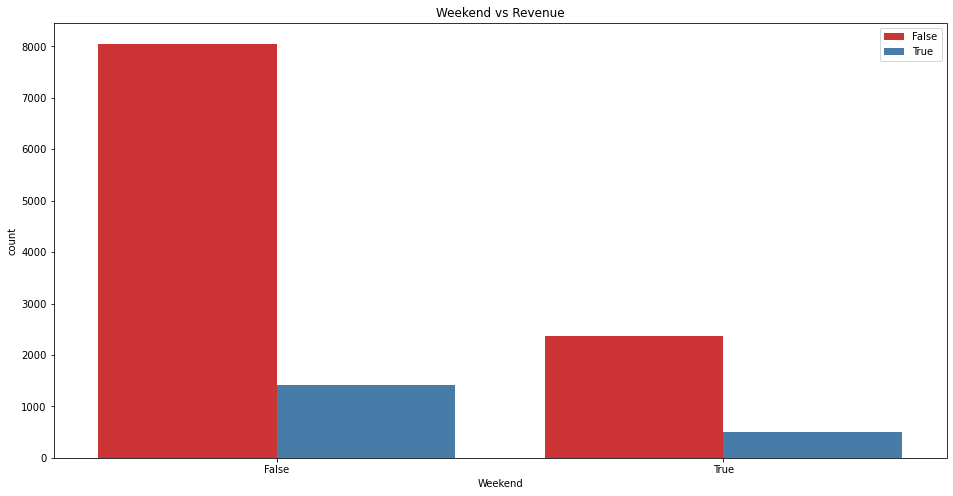

In [145]:
plt.figure(figsize=(16,8))
sns.countplot(df['Weekend'],hue=df['Revenue'],palette="Set1")
plt.title('Weekend vs Revenue')
plt.legend()
plt.show()

#### Browser,Region	&TrafficType

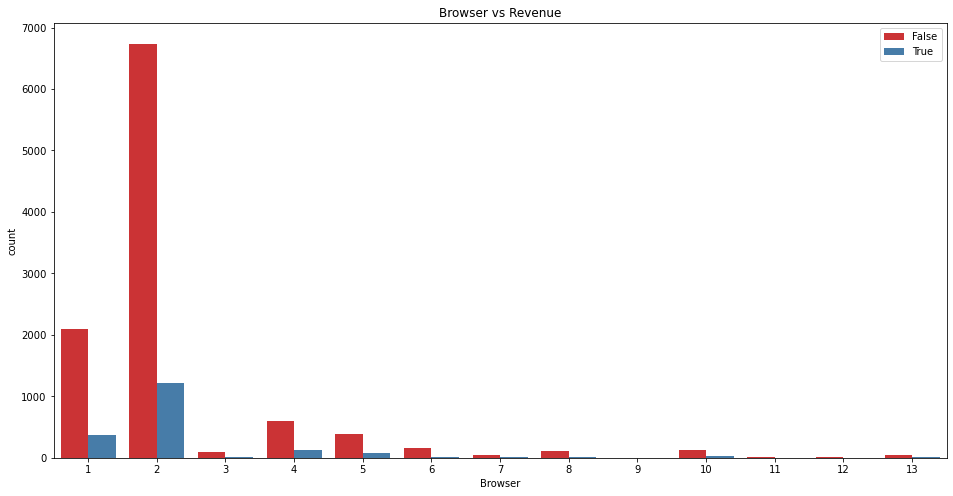

In [146]:
plt.figure(figsize=(16,8))
sns.countplot(df['Browser'],hue=df['Revenue'],palette="Set1")
plt.title('Browser vs Revenue')
plt.legend()
plt.show()

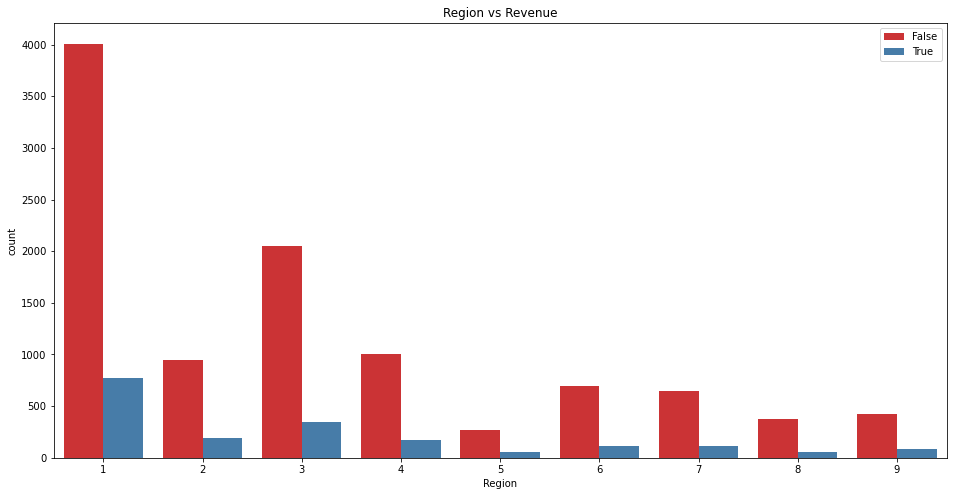

In [147]:
plt.figure(figsize=(16,8))
sns.countplot(df['Region'],hue=df['Revenue'],palette="Set1")
plt.title('Region vs Revenue')
plt.legend()
plt.show()

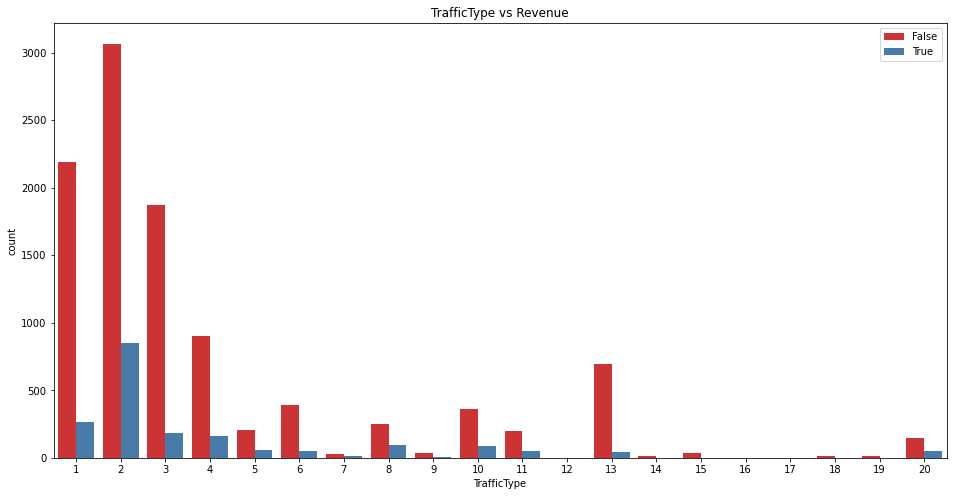

In [148]:
plt.figure(figsize=(16,8))
sns.countplot(df['TrafficType'],hue=df['Revenue'],palette="Set1")
plt.title('TrafficType vs Revenue')
plt.legend()
plt.show()

#### VisitorType

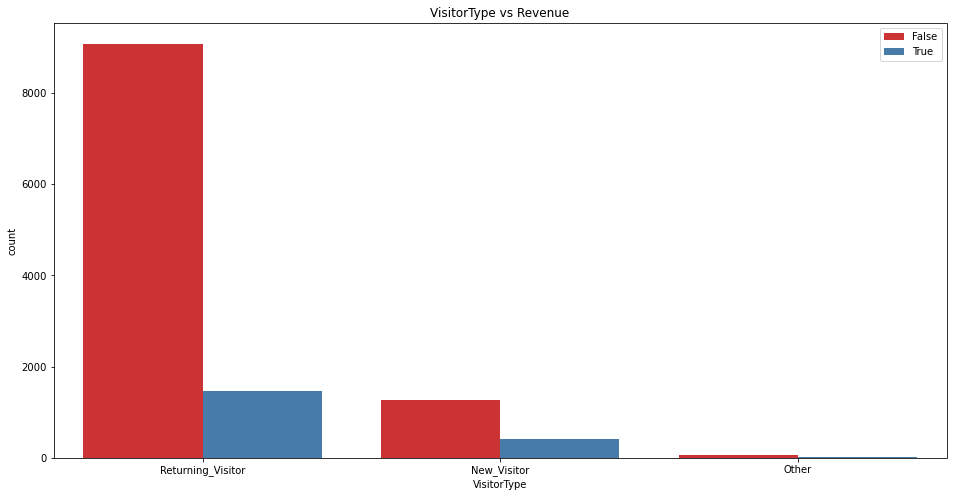

In [149]:
plt.figure(figsize=(16,8))
sns.countplot(df['VisitorType'],hue=df['Revenue'],palette="Set1")
plt.title('VisitorType vs Revenue')
plt.legend()
plt.show()

<AxesSubplot:>

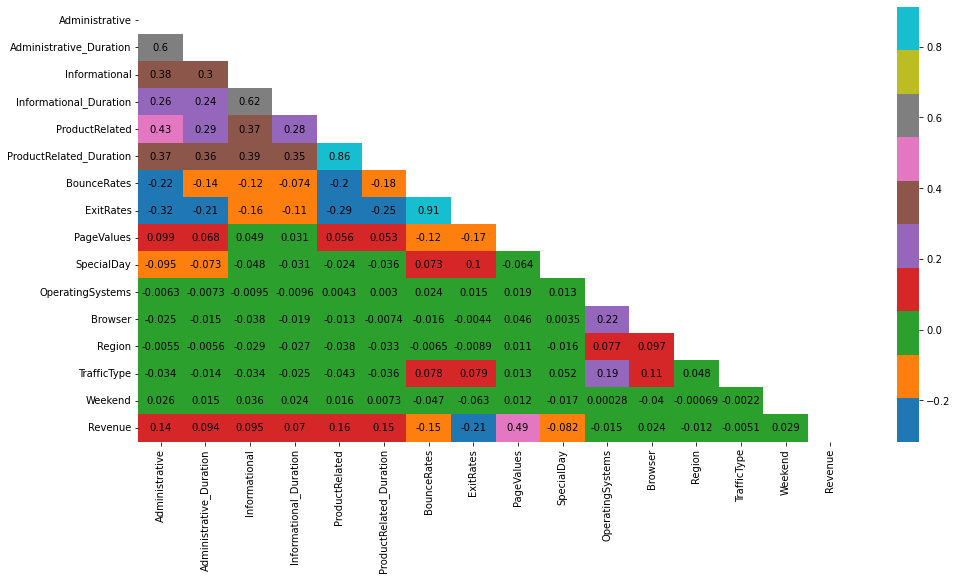

In [150]:
plt.figure(figsize=(16,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),annot=True,fmt='.2g',linecolor='black',annot_kws={"size": 10,"color":'BLACK'}, cmap=sns.color_palette("tab10", as_cmap=True),mask=mask )

In [151]:
corr = df.corr()

# Select the features with a correlation greater than 0.5 or less than -0.5
correlated_features = corr[abs(corr) > 0.5]

# Print the correlated features
print(correlated_features)

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                       NaN                      NaN   
Informational_Duration              NaN                      NaN   
ProductRelated                      NaN                      NaN   
ProductRelated_Duration             NaN                      NaN   
BounceRates                         NaN                      NaN   
ExitRates                           NaN                      NaN   
PageValues                          NaN                      NaN   
SpecialDay                          NaN                      NaN   
OperatingSystems                    NaN                      NaN   
Browser                             NaN                      NaN   
Region                              NaN                      NaN   
TrafficType                         NaN         

- From correlation we can notice that Administrative ,Administrative_Duration,Informational,               Informational_Duration,productRelated,poductRelated_Duration have correlation greater than 0.5 and we can notice multicollinearity between exit rates and bounce rates so we will decided that we will only continue with bouncerates 

In [152]:
df=df.drop('ExitRates',axis=1)


In [153]:
df.shape

(12330, 17)

<a id="4"></a>
### Model Building

In [154]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


- we can notice Month,visitortype,weekend and reveue are categorical columns lets convert them by encoding methods


In [155]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [156]:
df['Month']=label.fit_transform(df['Month'])
df['VisitorType']=label.fit_transform(df['VisitorType'])
df['Weekend']=label.fit_transform(df['Weekend'])
df['Revenue']=label.fit_transform(df['Revenue'])

In [157]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.0,0.0,2,3,3,1,4,2,1,0


In [158]:
df.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

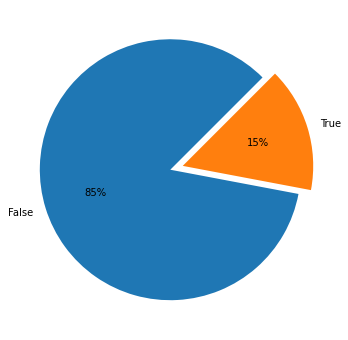

In [159]:
plt.figure(figsize=(6,6))
plt.pie(df.Revenue.value_counts(),labels=({False:0,True:1}),explode=[0,0.1],startangle=45,autopct='%.f%%',)
plt.show()

- We can notice our dataset is imbalance so we will use class balance technique like smote

In [160]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.0,0.0,2,3,3,1,4,2,1,0


In [161]:
x=df.drop(['Revenue'],axis=1)
y=df['Revenue']

In [162]:
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()

In [163]:
x=scale.fit_transform(x)

In [164]:
#oversampling a data to balance a class
from imblearn.over_sampling import SMOTE

In [165]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [166]:
y_res.value_counts()

0    10422
1    10422
Name: Revenue, dtype: int64

In [167]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify=y)

In [168]:
#shape after train and splitting a data
print("shape of x_train:",x_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (9864, 16)
shape of x_test: (2466, 16)
shape of y_train: (9864,)
shape of y_test: (2466,)


## Choosing best model and its parameters

In [169]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [170]:
# Creating a function to calculate best model for this problem
def find_best_model(x_res, y_res):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(x_res, y_res)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(x_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.881095
1,decision_tree,"{'criterion': 'gini', 'max_depth': 5}",0.895185
2,random_forest,{'n_estimators': 100},0.897922
3,svm,"{'C': 1, 'kernel': 'rbf'}",0.887380


In [175]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=0), x_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 90%


In [176]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=100, random_state=0,max_depth=5, min_samples_split=4,min_samples_leaf=2,)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [186]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve,auc
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[2047,   37],
       [ 206,  176]], dtype=int64)

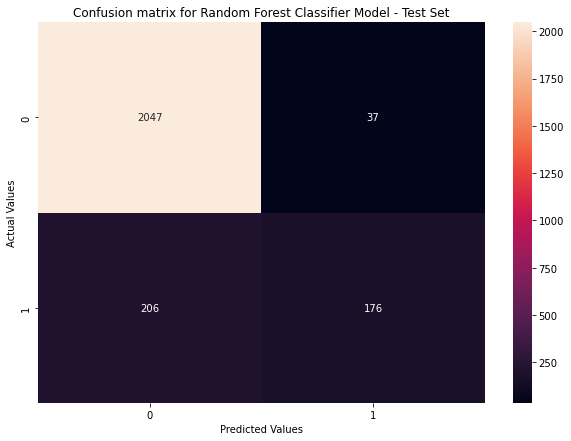

In [187]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [192]:
print("========================================================================================")
print('Classification report: \n',classification_report(y_test,y_pred))
print("========================================================================================")

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      2084
           1       0.83      0.46      0.59       382

    accuracy                           0.90      2466
   macro avg       0.87      0.72      0.77      2466
weighted avg       0.90      0.90      0.89      2466



1. Precision: Precision is a measure of the model's ability to correctly predict positive instances (class 1) out of all instances it labeled as positive. In this case, for class 0, the precision is 0.91, indicating that the model correctly predicted 91% of class 0 instances. For class 1, the precision is 0.83, implying that the model correctly predicted 83% of class 1 instances.

2. Recall: Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive instances (class 1) out of all actual positive instances in the dataset. For class 0, the recall is 0.98, indicating that the model captured 98% of class 0 instances. However, for class 1, the recall is 0.46, implying that the model only captured 46% of class 1 instances.

3. F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance, considering both precision and recall. For class 0, the F1-score is 0.94, representing a good balance between precision and recall. For class 1, the F1-score is 0.59, indicating a lower balance between precision and recall.

- Support: Support refers to the number of instances in each class in the dataset. In this case, there are 2,084 instances of class 0 and 382 instances of class 1.

4. Accuracy: Accuracy measures the overall correctness of the model's predictions. The accuracy obtained by the model is 0.90, meaning it correctly predicted 90% of all instances in the dataset.

5. Macro Avg: The macro average calculates the average performance across both classes, giving equal weight to each class. For precision, recall, and F1-score, the macro average is calculated as 0.87, 0.72, and 0.77, respectively.

6. Weighted Avg: The weighted average calculates the average performance across both classes, considering the support (number of instances) for each class. The weighted average for precision, recall, and F1-score is 0.90, indicating the overall performance of the model across the dataset.

- In summary, the model achieved high precision and recall for class 0, indicating strong performance in identifying instances of that class. However, for class 1, the model's recall is relatively low, suggesting it struggled to correctly classify instances of that class. The overall accuracy of the model is 90%, demonstrating its ability to predict the correct class for the majority of instances in the dataset.

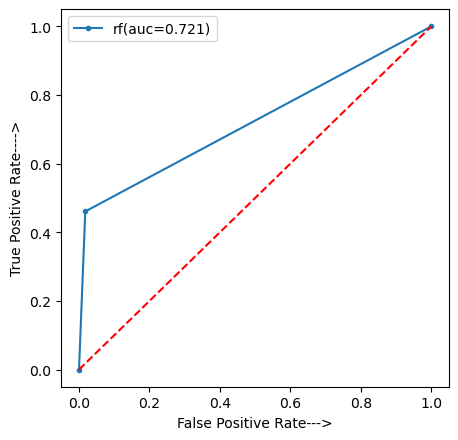

In [189]:
#plotting and comparing values of different roc curve

rf_fpr,rf_tpr,threshold=roc_curve(y_test,y_pred)
auc_rf=auc(rf_fpr,rf_tpr)


plt.figure(figsize=(5,5),dpi=100)
plt.plot(rf_fpr,rf_tpr,marker='.',label='rf(auc=%.3f)'%auc_rf)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate--->')
plt.ylabel('True Positive Rate---->')
plt.legend()
plt.show()

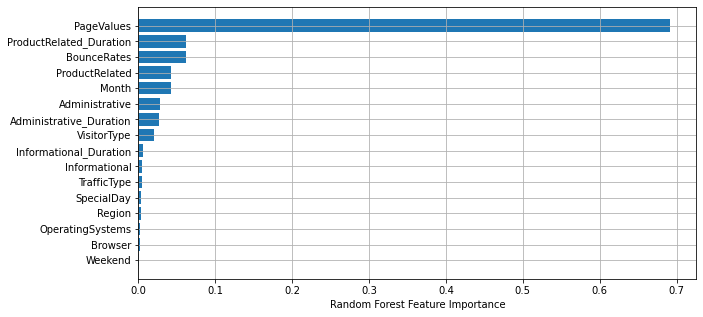

In [190]:
plt.figure(figsize=(10,5))
sorted_idx = classifier.feature_importances_.argsort()
plt.barh(df.iloc[:,:-1].columns[sorted_idx], classifier.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.grid()
plt.show()

In [199]:
import xgboost as xgb

In [201]:
classifier2 =xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)
classifier2.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [202]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve,auc
y_pred = classifier2.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[2008,   76],
       [ 152,  230]], dtype=int64)

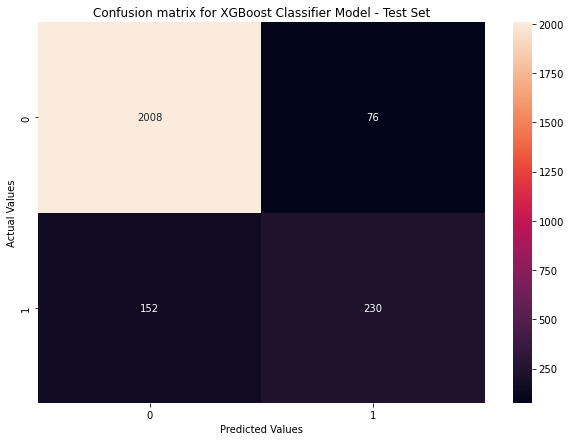

In [207]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix for XGBoost Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [204]:
print("========================================================================================")
print('Classification report: \n',classification_report(y_test,y_pred))
print("========================================================================================")

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      2084
           1       0.75      0.60      0.67       382

    accuracy                           0.91      2466
   macro avg       0.84      0.78      0.81      2466
weighted avg       0.90      0.91      0.90      2466



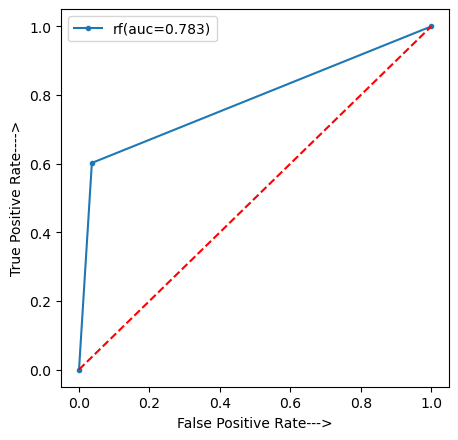

In [205]:
#plotting and comparing values of different roc curve

rf_fpr,rf_tpr,threshold=roc_curve(y_test,y_pred)
auc_rf=auc(rf_fpr,rf_tpr)


plt.figure(figsize=(5,5),dpi=100)
plt.plot(rf_fpr,rf_tpr,marker='.',label='rf(auc=%.3f)'%auc_rf)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate--->')
plt.ylabel('True Positive Rate---->')
plt.legend()
plt.show()

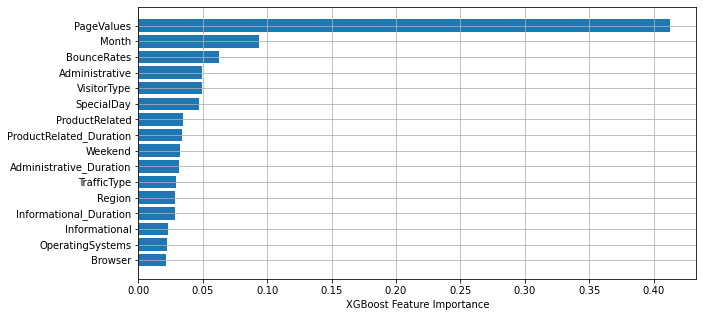

In [206]:
plt.figure(figsize=(10,5))
sorted_idx = classifier2.feature_importances_.argsort()
plt.barh(df.iloc[:,:-1].columns[sorted_idx], classifier2.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.grid()
plt.show()

1. PageValues are a measure of how valuable a page is to a user. They are calculated based on factors such as the amount of time a user spends on a page, the number of pages they visit after visiting a particular page, and the number of products they add to their cart after visiting a particular page.
2. XGBoost is a machine learning algorithm that can be used to predict customer behavior. It is a powerful algorithm that can learn complex relationships between features and target variables.
3. The importance of PageValues in consumer behavior analysis is suggested by the fact that XGBoost assigns a high weight to this feature. This means that XGBoost believes that PageValues are a good predictor of customer behavior.
4. In other words, the more time a user spends on a page, the more likely they are to be interested in the products or services that are offered on that page. This information can be used to improve the targeting of marketing campaigns and to improve the overall customer experience.



<a id="5"></a>

###  END


- Some Additional Approches also followed to get maximized revenue 

* **Use a minimalist approach to your UI.** A cluttered and confusing UI can make it difficult for customers to find what they're looking for, leading to higher bounce rates. A minimalist UI, on the other hand, is easy to use and navigate, which can lead to more conversions.
* **Be transparent with your customers about prices and product information.** Customers want to know exactly what they're getting before they make a purchase. Make sure your product pages are clear and concise, and that all of the important information is easily accessible.
* **Improve the stay duration by providing targeted ads and offers.** Targeted ads can help to keep customers on your website longer, while discounts and other incentives can encourage customers to browse your products and make a purchase.
* **Reduce bounce rates by making your website load quickly and creating attractive landing pages.** A slow-loading website can lead to high bounce rates, so make sure your website loads quickly and that your landing pages are visually appealing and engaging.
* **Send personalized emails to your customers and offer exclusive access to products.** Personalized emails are a great way to stay top-of-mind with your customers, while exclusive discounts and promotions can encourage returning customers to continue shopping with you.

